<font size=15>
Analyzing your emails
</font>

In this project I downloaded my emails and performed an EDA.

## Getting emails from my gmail account

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
import mailbox
mboxfile = "data.mbox"

mbox = mailbox.mbox(mboxfile)

In [3]:
# let's see the list of available keys in mbox
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
Sender
Received
Received
Date
From
To
Message-ID
Subject
MIME-Version
Content-Type
Content-Transfer-Encoding
REPLY-TO
X-SENDCLOUD-UUID
X-SENDCLOUD-LOG
X-SMTPAPI
List-Unsubscribe
Precedence


In [137]:
import csv

# create a CSV file with only the required attributes:
with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [195]:
# creating a pandas dataframe
df = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2117 non-null   object
 1   from     2157 non-null   object
 2   date     2135 non-null   object
 3   to       2125 non-null   object
 4   label    2157 non-null   object
 5   thread   2159 non-null   object
dtypes: object(6)
memory usage: 101.3+ KB


In [183]:
df.head()

,subject,from,date,to,label,thread
0,subject,from,date,to,label,thread
1,=?utf-8?q?LIVE_com_a_Binance=3A_qual_o_cen=C3=...,Binance <do_not_reply@mailer6.binance.com>,"Thu, 4 Jun 2020 03:48:43 +0000 (UTC)",murillo.bernardi@gmail.com,"Bin,Opened,Category Updates",1668538728279551963
2,Nieuw aanbod 05/06/20,Domvast Utrecht <info@domvast.nl>,"Fri, 05 Jun 2020 04:00:28 +0200",murillo.bernardi@gmail.com,"Inbox,Important,Opened,Category Promotions",1668622516651510344
3,=?utf-8?Q?You=20have=20made=20contact=20about=...,Only Expats <contact@onlyexpats.nl>,"Wed, 03 Jun 2020 09:07:37 +0000",murillo.bernardi@gmail.com,"Important,Bin,Category Updates,Unread",1668468186546668178
4,Password reset Xior Booking,Notification | Xior Booking <mail@xior-booking...,"Thu, 04 Jun 2020 16:56:21 +0200",murillo.bernardi@gmail.com,"Important,Bin,Opened,Category Personal",1668580724267129467


## Data Wrangling

##### Data Structuring

In [197]:
# droping the first row
df.drop([0], inplace=True)

In [198]:
# spliting the 'date'column into year/month/day/hour
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week day'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour

In [199]:
# converting week days to name
def name_day(day):
    if day == 0.0:
        return 'Monday'
    elif day == 1.0:
        return 'Tuesday'
    elif day == 2.0:
        return 'Wednesday'
    elif day == 3.0:
        return 'Thursday'
    elif day == 4.0:
        return 'Friday'
    elif day == 5.0:
        return 'Saturday'
    else:
        return 'Sunday'
    
df['week day'] = df['week day'].apply(name_day)

In [202]:
# reestructuring emails

import re

# function that takes an entire string from any column and extracts an email address
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string) #regular expression to find an email address
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan #if email is found, return that email. Else return nan

# converting data type
df['from'] = df['from'].astype('string')

# Applying the extract_email_ID function to each element of the 'from' column
df['from'] = df['from'].apply(lambda x: extract_email_ID(x))

In [207]:
# reestructuring the label column

# If an email is from your email address, then it is the sent email. Otherwise, it is an inbox email:
myemail = 'murillo.bernardi@gmail.com'
df['label'] = df['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

##### Data Cleaning

In [209]:
# checking the percentage os missing values for each variable
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

subject     1.946247
hour        1.899907
month       1.899907
year        1.899907
date        1.899907
to          1.575533
from        0.092678
week day    0.000000
thread      0.000000
label       0.000000
dtype: float64

In [210]:
# replacing missing values in subject/to/from columns with nullity indicator
df['subject'] = df['subject'].fillna('no-subject')
df['to'] = df['to'].fillna('not filled')
df['from'] = df['from'].fillna('not filled')
df['label'] = df['label'].fillna('no-label')

# dropping rows with missing values in date 
df.dropna(inplace=True)

In [211]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

hour        0.0
week day    0.0
month       0.0
year        0.0
thread      0.0
label       0.0
to          0.0
date        0.0
from        0.0
subject     0.0
dtype: float64

In [212]:
# checking for duplicates
df[df.duplicated()]

,subject,from,date,to,label,thread,year,month,week day,hour


In [215]:
# converting data type
df['subject'] = df['subject'].astype('string')
df['year'] = pd.to_numeric(df['year'], downcast='integer')
df['month'] = pd.to_numeric(df['month'], downcast='integer')
df['hour'] = pd.to_numeric(df['hour'], downcast='integer')

## Exploratory Data Analysis

In [217]:
# let's take a look at our columns
df.head()

,subject,from,date,to,label,thread,year,month,week day,hour
1,=?utf-8?q?LIVE_com_a_Binance=3A_qual_o_cen=C3=...,do_not_reply@mailer6.binance.com,2020-06-04 03:48:43+00:00,murillo.bernardi@gmail.com,inbox,1668538728279551963,2020,6,Thursday,3
2,Nieuw aanbod 05/06/20,info@domvast.nl,2020-06-05 02:00:28+00:00,murillo.bernardi@gmail.com,inbox,1668622516651510344,2020,6,Friday,2
3,=?utf-8?Q?You=20have=20made=20contact=20about=...,contact@onlyexpats.nl,2020-06-03 09:07:37+00:00,murillo.bernardi@gmail.com,inbox,1668468186546668178,2020,6,Wednesday,9
4,Password reset Xior Booking,mail@xior-booking.com,2020-06-04 14:56:21+00:00,murillo.bernardi@gmail.com,inbox,1668580724267129467,2020,6,Thursday,14
5,We staan vandaag voor de deur tussen 13.54 - 1...,noreply@dhlparcel.nl,2020-06-03 12:17:52+00:00,murillo.bernardi@gmail.com,inbox,1668480157596571079,2020,6,Wednesday,12


### How many emails did I send and receive?

In [267]:
print(df['date'].min().strftime('%a, %d %b %Y %I:%M %p'))
print(df['date'].max().strftime('%a, %d %b %Y %I:%M %p'))
print(df['label'].value_counts())

Sun, 21 Sep 2014 09:14 PM
Sun, 07 Jun 2020 04:11 PM
inbox    1584
sent      533
Name: label, dtype: int64


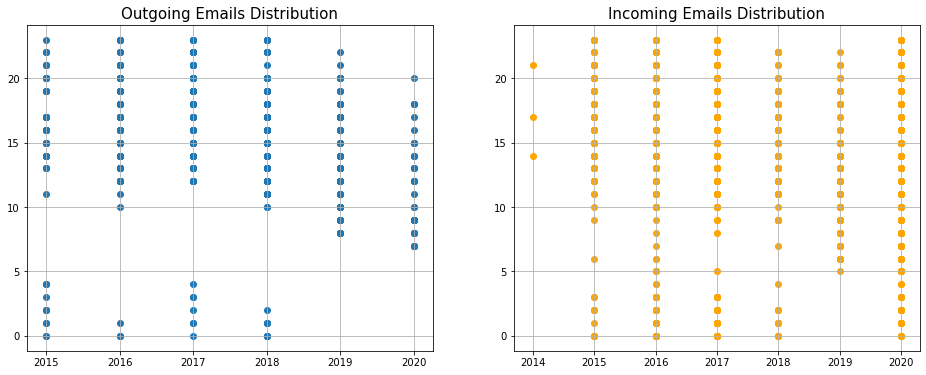

In [288]:
# plotting emails distribution over years
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.scatter(x=df[df['label']=='sent']['year'], y=df[df['label']=='sent']['hour'])
plt.grid(True)
plt.title('Outgoing Emails Distribution', fontsize=15)

plt.subplot(1, 2, 2)
plt.scatter(x=df[df['label']=='inbox']['year'], y=df[df['label']=='inbox']['hour'], color='orange')
plt.grid(True)
plt.title('Incoming Emails Distribution', fontsize=15);

In [276]:
# creating separated df for inbox and sent
incoming = df[df['label'] == 'inbox']
outgoing = df[df['label'] == 'sent']

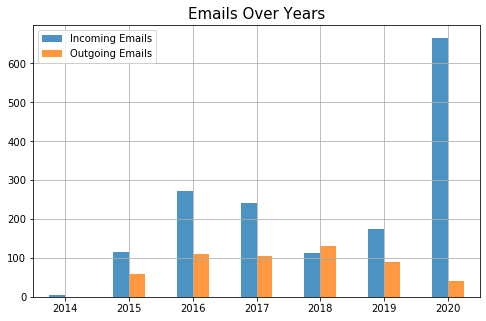

In [293]:

year = pd.DataFrame({'Incoming Emails': incoming['year'].value_counts(),
                     'Outgoing Emails': outgoing['year'].value_counts()})

year.plot(kind='bar', figsize=(8,5), alpha=0.8, rot=0.5)
plt.title('Emails Over Years', fontsize=15)
plt.grid(True)

### Most active time

<ipython-input-284-3c0f56c351e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outgoing['week day'] = pd.Categorical(outgoing['week day'], categories=
<ipython-input-284-3c0f56c351e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incoming['week day'] = pd.Categorical(incoming['week day'], categories=


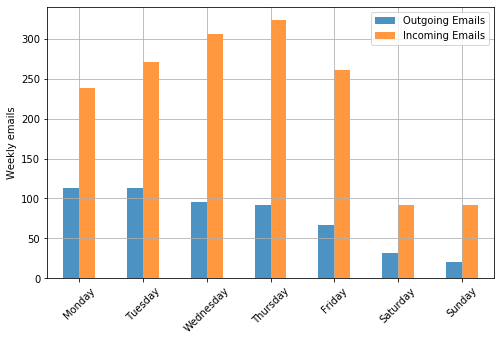

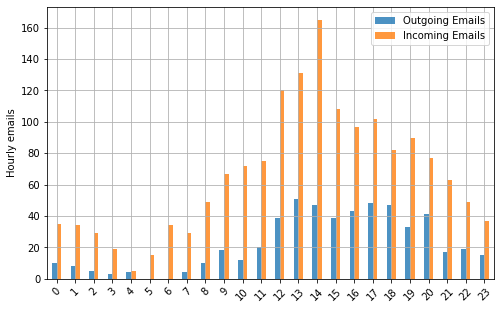

In [284]:
# ordering the days of week
outgoing['week day'] = pd.Categorical(outgoing['week day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

incoming['week day'] = pd.Categorical(incoming['week day'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

# creating new DFs for the grouped series
df_day = pd.DataFrame(data={'Outgoing Emails': outgoing['week day'].value_counts(),
                            'Incoming Emails': incoming['week day'].value_counts()})
df_hour = pd.DataFrame(data={'Outgoing Emails': outgoing['hour'].value_counts(), 
                             'Incoming Emails': incoming['hour'].value_counts()})


# creating the bar plots
df_day.plot(kind='bar', figsize=(8,5), rot=45, alpha=0.8)
plt.xlabel('')
plt.ylabel('Weekly emails')
plt.grid(True)

df_hour.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.8)
plt.ylabel('Hourly emails');
plt.grid(True)

### Who sent me most emails?

In [261]:
df['from'].value_counts().head(10)

murillo.bernardi@gmail.com        533
andleitao@gmail.com               134
M.Rookmaaker@umcutrecht.nl         58
andleitao@iqsc.usp.br              57
jack@jacksflightclub.co.uk         53
bioengenharia@eesc.usp.br          44
cm6.melo@gmail.com                 29
r.soareslindoso@uu.nl              26
ailtonsouza@casaagencia.com.br     26
no-reply@accounts.google.com       25
Name: from, dtype: int64

### Most used words

In [262]:
from wordcloud import WordCloud

text = ' '.join(map(str, df['subject'].values))

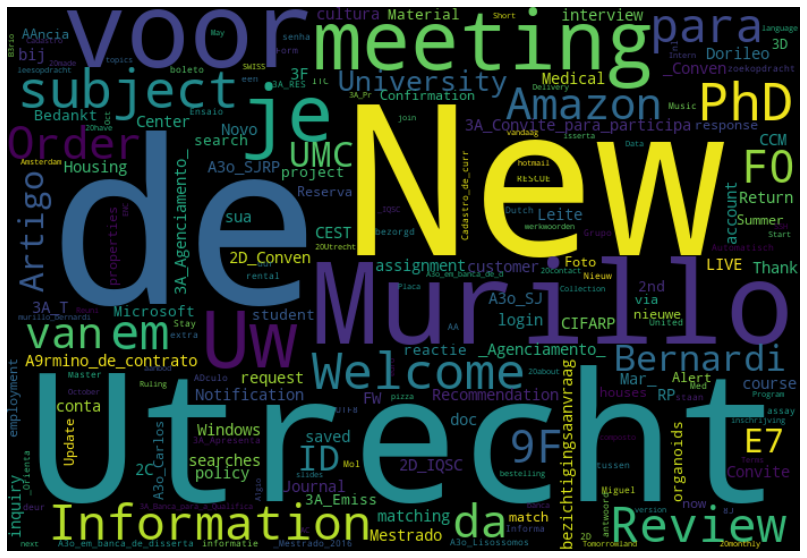

In [264]:
stopwords = ['Re', 'UTF', 'C3', '2E', 'A7', 'E2', 'A7', 'iso', 'A3o', 'A3o_', 'RES']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)

for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

wordcloud.to_file("wordCloud.png");

## Takeaways

With this simple analysis we can take a few information about our mailbox:

* How many emails we received and sent in the past years;
* With whom you interacted most;
* The most active time, which in this case was on Thursdays and Wednesdays, between 12-15h;
* Most used words in the subject.

You can go further and also analyze the email text body, create sentimental analysis, identify unwanted emails, and so on.

In my case, I didn't have many emails stored anymore. But it was a nice project to learn how to get the content from my email and explore it. 